Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [17]:
# cell for imports. All imports must go here.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [18]:
df = pd.read_csv('train.csv')

df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

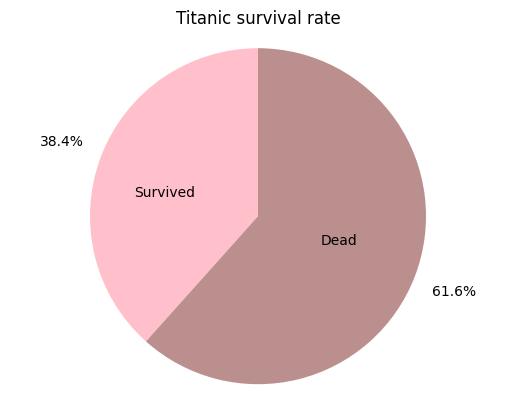

In [20]:
dead = df[df['Survived'] == 0]
survived = df[df['Survived'] == 1]

sizes = [len(survived), len(dead)]
labels = ('Survived', 'Dead')
colors = ['pink', 'rosybrown']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
       startangle=90, pctdistance=1.25, labeldistance=.4)
ax.axis('equal')
plt.title('Titanic survival rate')
plt.show()

The visualisation shows, that only around a third of Titanic passengers survived.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


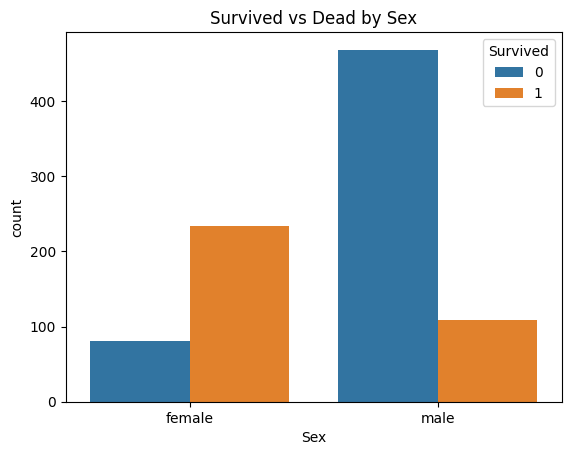

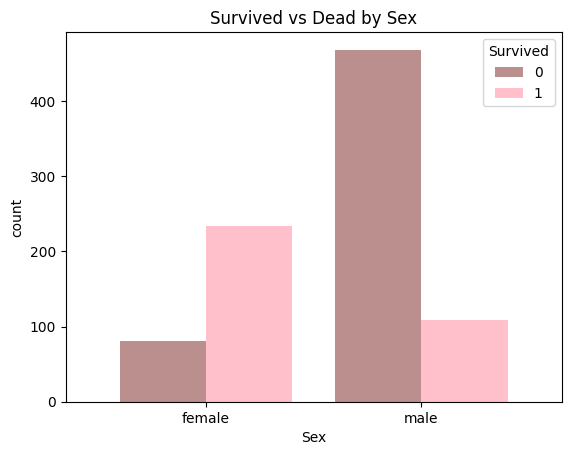

In [21]:
survival_by_sex_df = df.groupby(['Survived', 'Sex'], as_index=False).size()

pivot_df = survival_by_sex_df.pivot(index='Sex', columns='Survived',
                                    values='size')
pivot_df.columns = ['0', '1']
colors = ['rosybrown', 'pink']

pivot_df.plot(kind='bar', color=colors, width=0.8)
plt.title('Survived vs Dead by Sex')
plt.xlabel('Sex')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.legend(title='Survived')
plt.show()

Originally there were more men than women on the board. However, the number of female survivals is twice as big as the number of male ones. Losses among male passengers are around five times greater compared to female ones.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

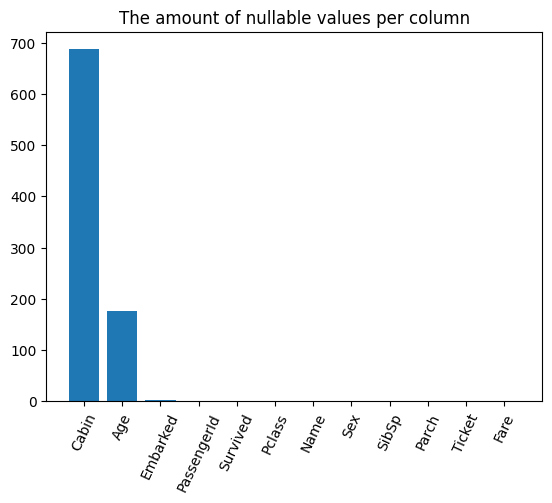

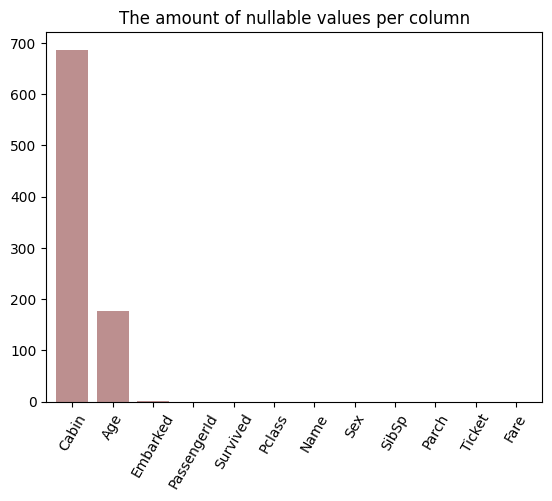

In [22]:
missing_values_count = df.isnull().sum()

missing_values_count.sort_values(ascending=False, inplace=True)

missing_values_count.plot(kind='bar', width=0.8, color='rosybrown')
plt.title('The amount of nullable values per column')
plt.xticks(rotation=60)
plt.show()

Almost all the values in column "Cabin" are missing, therefore this column has no value for a research. Around a quater of values in the "Age" column are missing, which may be acceptable, but still will not show a real picture when conducting research using this column. All the other columns have either a tiny amount or absolutely no nullable values.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

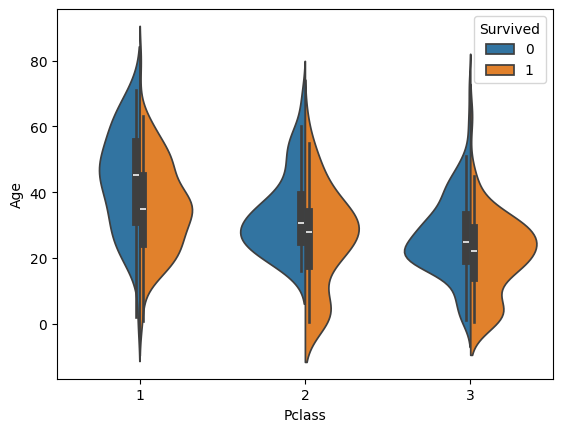

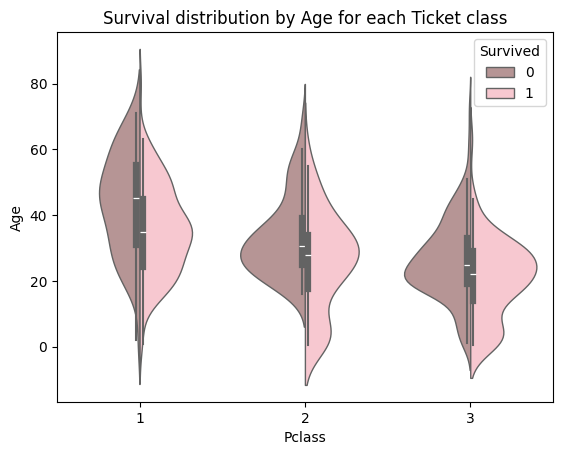

In [23]:
df_cleared = df.dropna(subset=['Age'])

sns.violinplot(data=df_cleared,
               x='Pclass', y='Age', hue='Survived',
               split=True, linewidth=1,
               palette={0: 'rosybrown', 1: 'pink'})
plt.title('Survival distribution by Age for each Ticket class')
plt.show()

- The oldest passengers had tickets of the first class.
- In the first class the number of dead passengers aged up to 40 years is mostly less than a number of survivals.
- Losses among children in the second class are the smallest.
- Losses among pensioners are the greatest in the first class.
- In the third class dead and survived adult passengers are proportional; kids, on the contrary, were mostly rescued.
- The biggest number of dead children is in the third class.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


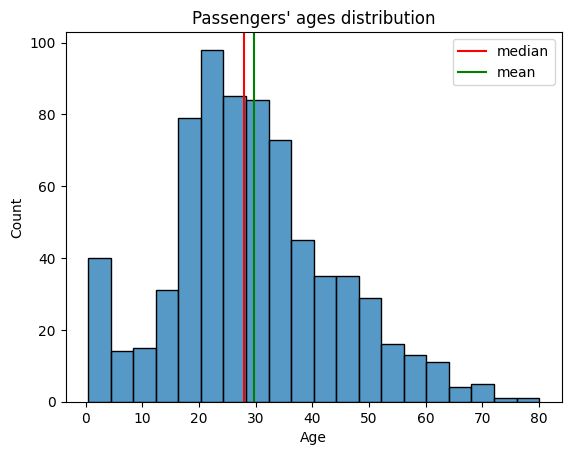

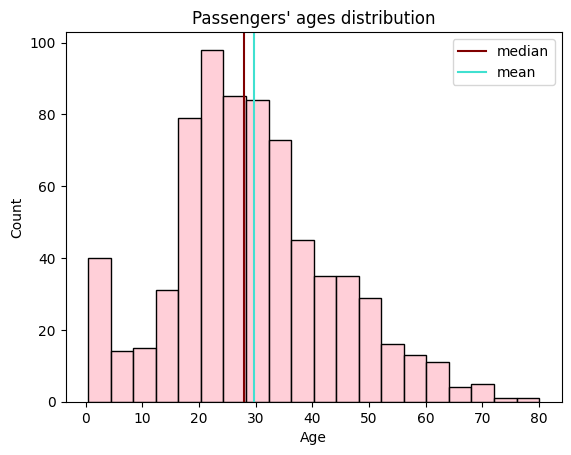

In [24]:
sns.histplot(df, x="Age", bins=20, color='pink', edgecolor='black')

median_age = df['Age'].median()
mean_age = df['Age'].mean()

plt.axvline(median_age, 0, 1, color='maroon')
plt.axvline(mean_age, 0, 1, color='turquoise')


plt.legend(['median', 'mean'])
plt.title("Passengers' ages distribution")
plt.show()

- The largest age group on Titanic was 20-24 y.o
- The smallest age group on Titanic was 72-80 y.o.
- Among kids the most prevailing age group was from 0-4 y.o.
- Except from 0-4 y.o. and 68-72 y.o. age groups, the number of passengers up to 20-24 y.o. increase by age, and from 20-24 and older starts to decrease.
- An average age on the board was 30. The middle age - 28. Median < mean, so the distribution is positively skewed, meaning that the largest age groups are located closer to the left edge.


7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Did passengers embarking from certain ports tend to pay higher or lower fares compared to others?

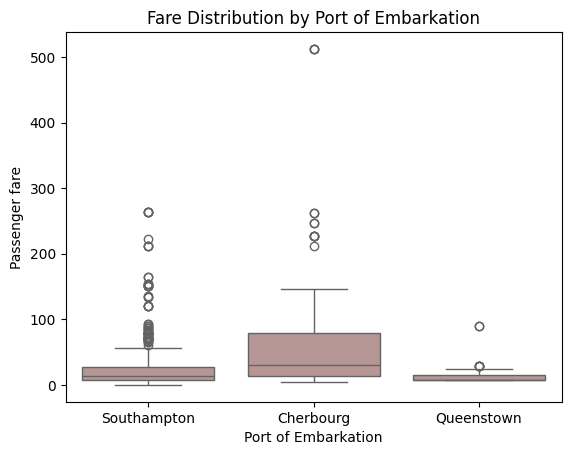

In [25]:
df_cleared = df.dropna(subset=['Embarked'])

sns.boxplot(x='Embarked', y='Fare', data=df_cleared, color='rosybrown')
plt.xticks(ticks=['C', 'Q', 'S'], labels=['Cherbourg', 'Queenstown', 'Southampton'])
plt.title('Fare Distribution by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Passenger fare')
plt.show()

- From the visualisation it is clearly seen that at the port Cherbourg mostly passengers tended to pay more than on the other ports (more than 20 m.u.). The biggest fare was also provided by a passenger embarking at this port (more than 500 m.u.).
- At the port Queenstown, passengers mostly paid less (up to 10 m.u. fare). However, there were two exceptional passenger who payed around 20 and 100 m.u.
- At the port Southampton fare distribution is basically 5-20m.u. per passenger. However, there are a lot of exceptional passengers who payed from 70 to 100m.u fare. Also, there were several passengers who payed up to 300m.u.

Conseqiently, among these three ports at the Cherbourg passengers tended to pay the most, and at the Queenstown - the least.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

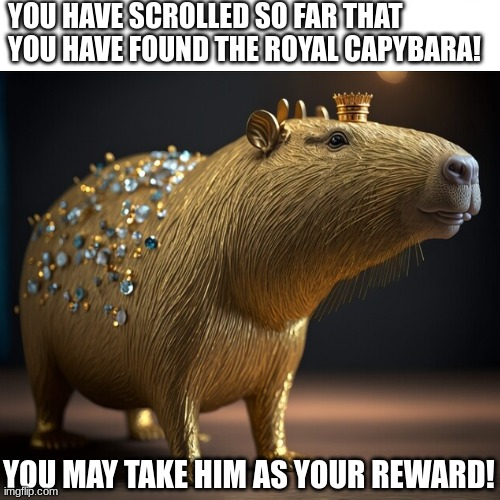